<a href="https://colab.research.google.com/github/sanketnaik99/us-accidents-analysis/blob/main/us_accidents_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Accidents Exploratory Data Analysis

## Table of Contents
- [Installing the Kaggle CLI](#installing-the-kaggle-cli)
- [Downloading the Data](#downloading-the-data)
- [Data Preparation and Cleaning](#data-preparation-and-cleaning)
  - [Loading the dataset and initial observations](#loading-the-dataset-and-initial-observations)
  - [Missing Values](#missing-values)
  - [Boolean Values](#boolean-values)
  - [City Data](#city-data)
  - [Zipcode Data](#zipcode-data)
  - [Cleaning the Dataset](#cleaning-the-dataset)
- [Exploratory Analysis & Visualization](#exploratory-analysis-&-visualization)
  - [City](#city)
    - [Top 5 cities by the number of accidents](#top-5-cities-by-the-number-of-accidents)
    - [Distribution of accidents by Cities](#distribution-of-accidents-by-cities)
    - [Number of Accidents from very high accident cities](#number-of-accidents-from-very-high-accident-cities)
- [Questions and Answers](#questions-&-answers)
- [Summary & Conclusions](#summary-&-conclusions)

## Installing the Kaggle CLI
The Kaggle CLI will let us donwload the dataset easily and we won't have to upload the dataset to colab every time we run the notebook.

In [1]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## Downloading the Data
We can now download the data using the Kaggle CLI.
Kaggle CLI downloads the dataset in a zip format. We can then use the unzip package to unzip the contents of the zip file.

In [ ]:
!kaggle datasets download -d sobhanmoosavi/us-accidents

 98% 292M/299M [00:03<00:00, 153MB/s]
100% 299M/299M [00:03<00:00, 91.2MB/s]


In [ ]:
import os
os.listdir()

['.config', 'us-accidents.zip', 'kaggle.json', 'sample_data']

In [ ]:
!mkdir data

In [ ]:
!unzip us-accidents.zip -d data

Archive:  us-accidents.zip
  inflating: data/US_Accidents_Dec20.csv  


We can see that the `us-accidents.zip` file consists of a single CSV file called `US_Accidents_Dec20.csv`

In [ ]:
data_filename = './data/US_Accidents_Dec20.csv'

##  Data Preparation & Cleaning
We will follow these steps in the process of data preparation and cleaning -
- Load the file using Pandas.
- Look at some infromation about the data and columns.
- Fix any missing or incorrect values.

### Loading the dataset and initial observations

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
from tabulate import tabulate

In [ ]:
df = pd.read_csv(data_filename)

In [ ]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
print(f'Number of columns = {len(df.columns)}')
print(df.info())

Number of columns = 49
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 


We can see that the dataset has 49 columns. The distribution of these columns is as follows - 
1. Boolean Columns - 13
2. Object Columns - 21
3. Numerical Columns - 15

The `describe` method displays descriptive statistics about the numerical columns present in the dataset.

In [ ]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.716477e+06,4.232541e+06,4.232541e+06,4.232541e+06,1.516064e+06,1.516064e+06,4.232541e+06,1.544592e+06,4.142641e+06,2.336540e+06,4.137074e+06,4.156157e+06,4.133873e+06,3.753215e+06,2.166952e+06
mean,2.083517e+02,2.305035e+00,3.639782e+01,-9.546420e+01,3.690061e+01,-9.859901e+01,3.357021e-01,6.141507e+03,6.147799e+01,5.489319e+01,6.567422e+01,2.969371e+01,9.111991e+00,7.903433e+00,1.244719e-02
std,2.124413e+01,5.332261e-01,4.964404e+00,1.735319e+01,5.165629e+00,1.849590e+01,1.602143e+00,1.492268e+04,1.852586e+01,2.272355e+01,2.272342e+01,8.639260e-01,2.817582e+00,5.330998e+00,1.637154e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.352058e+01,-1.173570e+02,3.385420e+01,-1.182077e+02,0.000000e+00,8.980000e+02,4.900000e+01,3.800000e+01,4.900000e+01,2.964000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.582542e+01,-9.002078e+01,3.735134e+01,-9.437987e+01,0.000000e+00,2.890000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.993000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.018313e+01,-8.084682e+01,4.072593e+01,-8.087449e+01,8.900000e-02,7.330000e+03,7.520000e+01,7.300000e+01,8.500000e+01,3.008000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,9.999997e+06,2.030000e+02,1.890000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.500000e+01


### Missing values
To find which columns have missing values and how many values are missing, we can use the `isna` function and then apply the `sum` function to get the total count of missing values for each column. we can then sort these values using the `sort_values` function. Finally, if we divide them by the length of the DataFrame, we will get the fraction of missing values for each column.

In [ ]:
missing_fractions = df.isna().sum().sort_values(ascending=False) / len(df)
missing_fractions

End_Lat                  6.418076e-01
End_Lng                  6.418076e-01
Number                   6.350674e-01
Precipitation(in)        4.880258e-01
Wind_Chill(F)            4.479581e-01
TMC                      3.581924e-01
Wind_Speed(mph)          1.132478e-01
Visibility(mi)           2.331176e-02
Weather_Condition        2.324443e-02
Humidity(%)              2.255548e-02
Temperature(F)           2.124020e-02
Wind_Direction           1.975433e-02
Pressure(in)             1.804684e-02
Weather_Timestamp        1.480057e-02
Airport_Code             2.120003e-03
Timezone                 1.090362e-03
Zipcode                  3.052540e-04
Nautical_Twilight        3.331332e-05
Astronomical_Twilight    3.331332e-05
Civil_Twilight           3.331332e-05
Sunrise_Sunset           3.331332e-05
City                     3.236826e-05
Description              4.725294e-07
Amenity                  0.000000e+00
Street                   0.000000e+00
Source                   0.000000e+00
Severity    

We can remove the columns that have zero missing values so that we can plot the values in a better way.

In [ ]:
missing_fractions[missing_fractions != 0]

End_Lat                  6.418076e-01
End_Lng                  6.418076e-01
Number                   6.350674e-01
Precipitation(in)        4.880258e-01
Wind_Chill(F)            4.479581e-01
TMC                      3.581924e-01
Wind_Speed(mph)          1.132478e-01
Visibility(mi)           2.331176e-02
Weather_Condition        2.324443e-02
Humidity(%)              2.255548e-02
Temperature(F)           2.124020e-02
Wind_Direction           1.975433e-02
Pressure(in)             1.804684e-02
Weather_Timestamp        1.480057e-02
Airport_Code             2.120003e-03
Timezone                 1.090362e-03
Zipcode                  3.052540e-04
Nautical_Twilight        3.331332e-05
Astronomical_Twilight    3.331332e-05
Civil_Twilight           3.331332e-05
Sunrise_Sunset           3.331332e-05
City                     3.236826e-05
Description              4.725294e-07
dtype: float64

We can plot these columns using the `plot` function so that we can visualize the data more efficiently.

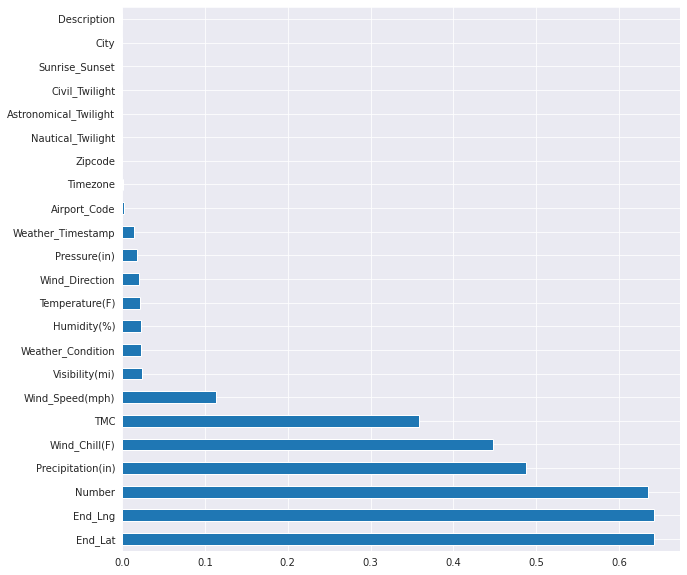

In [ ]:
plt.figure(figsize=(10,10))
missing_fractions[missing_fractions != 0].plot(kind='barh')

We can see that some of these columns have many missing values. For example, `End_Lng` and `End_Lat` have more than **67%** missing data. These columns won't be useful for extracting any meaningful information from the dataset. Similarly, we can remove any other columns that have more than **10%** missing data.



### Boolean Values
We can have a look at the boolean values to see if the `True` and `False` values have any relevant information.
We can do this by checking the count of `True` and `False` values in the specific columns.

First, we can select the boolean columns and make a separate DataFrame out of them.

In [ ]:
booleans = df.select_dtypes(include='bool')
booleans.head()

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False


We can now check to see the distribution of `True` and `False` values for each column.

In [ ]:
data = []
total_count = len(booleans)
for column in booleans.columns:
  data.append([column, (len(booleans[column][booleans[column] == True]) / total_count) * 100, (len(booleans[column][booleans[column] == False]) / total_count) * 100, total_count])
print(tabulate(data, headers=['Columns', 'True %', 'False %', 'Total Count'], tablefmt='orgtbl'))

| Columns         |      True % |   False % |   Total Count |
|-----------------+-------------+-----------+---------------|
| Amenity         |  1.16786    |   98.8321 |       4232541 |
| Bump            |  0.0203424  |   99.9797 |       4232541 |
| Crossing        |  8.20824    |   91.7918 |       4232541 |
| Give_Way        |  0.311751   |   99.6882 |       4232541 |
| Junction        |  8.02454    |   91.9755 |       4232541 |
| No_Exit         |  0.141026   |   99.859  |       4232541 |
| Railway         |  0.909926   |   99.0901 |       4232541 |
| Roundabout      |  0.00559947 |   99.9944 |       4232541 |
| Station         |  2.0358     |   97.9642 |       4232541 |
| Stop            |  1.70543    |   98.2946 |       4232541 |
| Traffic_Calming |  0.0501117  |   99.9499 |       4232541 |
| Traffic_Signal  | 17.2027     |   82.7973 |       4232541 |
| Turning_Loop    |  0          |  100      |       4232541 |


We can see that the percentage of `False` values is very high for most columns. These columns can be dropped since these can be a sign of missing data or irrelevant data. Hence, we will drop all columns where the **% of False values is >= 99%**

### City Data

We have observed above that some of the data related to city names is missing. However, we have all the data for the `Start_lat` and `Start_lng` which indicate the latitude and longitude where the accident occurred. We can use this to check where the accident occurred.



In [ ]:
print(f'Number of missing values in the City column = {df.City.isna().sum()}')

Number of missing values in the City column = 137


In [ ]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim

In [ ]:
def get_city(index):
  data_point = df.iloc[index]
  start_lat= data_point["Start_Lat"]
  start_lng = data_point["Start_Lng"]
  geolocator = Nominatim(user_agent="geoapiExercises")
  try:
    location = geolocator.reverse(f"{start_lat},{start_lng}", timeout=None) 
    address = location.raw['address']
  except GeocoderTimedOut as e:
    print(f"Geocoder Timed out at index {index}")
    return np.NaN, False
  try:
    city = address['city']
    # print(f"FOUND City for index {index} = {city}")
    return city, True
  except:
    # print(f"NOT FOUND City for index = {index}")
    return np.NaN, False

In [ ]:
indexes = df[df['City'].isnull()].index.tolist()
total_found = 0
for index in indexes:
  value, result = get_city(index)
  if result == True:
    total_found += 1
  df.at[index, 'City'] = value

In [ ]:
print(f"Total missing values found = {total_found}")
print(f'Number of missing values in the City column = {df.City.isna().sum()}')

Total missing values found = 55
Number of missing values in the City column = 82


Not all City names were found but this function was able to find at least **55** city names. We can drop the remaining **82** values since they do not form a major chunk of the data.

### Zipcode Data
The Zipcode data also has a few missing values. We can use a technique similar to the one used for the City data and get the Zipcode for the missing values using the `Start_lat` and `Start_lng`. 

In [ ]:
print(f'Number of missing values in the Zipcode column = {df.Zipcode.isna().sum()}')

Number of missing values in the Zipcode column = 1292


We can use the function used for the City Data with some modifications to get the Zipcode for the specified co-ordinates.

In [ ]:
def get_zipcode(index):
  data_point = df.iloc[index]
  start_lat= data_point["Start_Lat"]
  start_lng = data_point["Start_Lng"]
  geolocator = Nominatim(user_agent="geoapiExercises")
  try:
    location = geolocator.reverse(f"{start_lat},{start_lng}", timeout=None) 
    address = location.raw['address']
  except GeocoderTimedOut as e:
    print(f"Geocoder Timed out at index {index}")
    return np.NaN, False
  try:
    zipcode = address['postcode']
    # print(f"FOUND ZipCode for index {index} = {zipcode}")
    return zipcode, True
  except:
    # print(f"NOT FOUND ZipCode for index = {index}")
    return np.NaN, False

In [ ]:
indexes = df[df['Zipcode'].isnull()].index.tolist()
total_found = 0
for index in indexes:
  value, result = get_zipcode(index)
  if result == True:
    total_found += 1
  df.at[index, 'Zipcode'] = value

In [ ]:
print(f"Total missing values found = {total_found}")
print(f'Number of missing values in the Zipcode column = {df.Zipcode.isna().sum()}')

Total missing values found = 801
Number of missing values in the Zipcode column = 491


This technique still doesn't work for all cases and some missing values are still present. These can dropped since they don't form a huge chunk of the dataset.

### Cleaning the Dataset
As we have concluded from the above steps, we can remove some of the columns that have missing or irrelevant values. The columns that will be removed are as follows.

In [ ]:
dropped_cols = ['End_Lat', 'End_Lng', 'Number', 'Precipitation(in)', 'Wind_Chill(F)', 'TMC', 'Bump', 'Give_Way', 'No_Exit', 'Railway', 'Roundabout', 'Traffic_Calming', 'Turning_Loop']

In [ ]:
df.drop(dropped_cols, inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 36 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   Distance(mi)           float64
 8   Description            object 
 9   Street                 object 
 10  Side                   object 
 11  City                   object 
 12  County                 object 
 13  State                  object 
 14  Zipcode                object 
 15  Country                object 
 16  Timezone               object 
 17  Airport_Code           object 
 18  Weather_Timestamp      object 
 19  Temperature(F)         float64
 20  Humidity(%)            float64
 21  Pressure(in)           float64
 22  Visibility(mi)    

Next, we can drop the `NaN` (null) values from the dataset.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df[df.isnull()].value_counts()

Series([], dtype: int64)

Now that we have no null values, we can save the DataFrame as a CSV so that we can load it later.

In [ ]:
df.to_csv('./data/US_Accidents_Dec20_Cleaned.csv')

### Loading the Cleaned Dataset
The cleaned dataset was uploaded to Kaggle so that we can use the Kaggle CLI to download the data easily.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
from tabulate import tabulate

In [6]:
!kaggle datasets download -d sanketnaik99/us-accidents-december-2020-cleaned

 92% 238M/258M [00:01<00:00, 123MB/s]
100% 258M/258M [00:01<00:00, 144MB/s]


In [7]:
!mkdir data

In [9]:
!unzip us-accidents-december-2020-cleaned.zip -d data

Archive:  us-accidents-december-2020-cleaned.zip
  inflating: data/US_Accidents_Dec20_Cleaned.csv  


In [10]:
data_filename = './data/US_Accidents_Dec20_Cleaned.csv'

In [11]:
df = pd.read_csv(data_filename)

## Exploratory Analysis & Visualization
In this step we will analyze some important columns which will help us get a better understanding of the dataset. Some of the important columns that we will be looking at are -
1. City
2. Start Time
3. State

### City
The city coulmn states the name of the city where the accident occurred. This can be helpful to answer some important questions such as -
1. Which are the top 5 cities by number of accidents.
2. What is the distribution of accidents by cities?
3. How many accidents occurred in cities with very high number of accidents (>=10,000)

First, we can check the number of unique values for the cities field.

In [22]:
cities = df.City.unique()
len(cities)

11824

As shown above, the dataset contains accident data from 12,251 cities out of 19,502 total cities as of 2019.


#### Top 5 cities by the number of accidents

We can have a look at the top cities by number of accidents by using the `value_counts` function which returns the count of each unique value in a Column.

In [12]:
cities_by_accidents = df.City.value_counts()
cities_by_accidents[:5]

Houston        101525
Charlotte       78838
Dallas          73274
Los Angeles     69622
Austin          59853
Name: City, dtype: int64

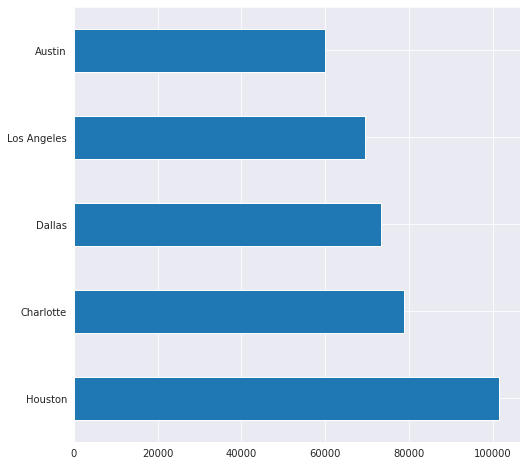

In [13]:
plt.figure(figsize=(8,8))
cities_by_accidents[:5].plot(kind='barh')

We can see that Houston, Charlotte, Dallas, Los Angeles and Austin have the highest number of accidents. Interestingly, 3 out of the top 5 cities are located in the state of Texas.

#### Distribution of accidents by cities
We can analyze the number of accidents per city to check the distribution of number of accidents per city.

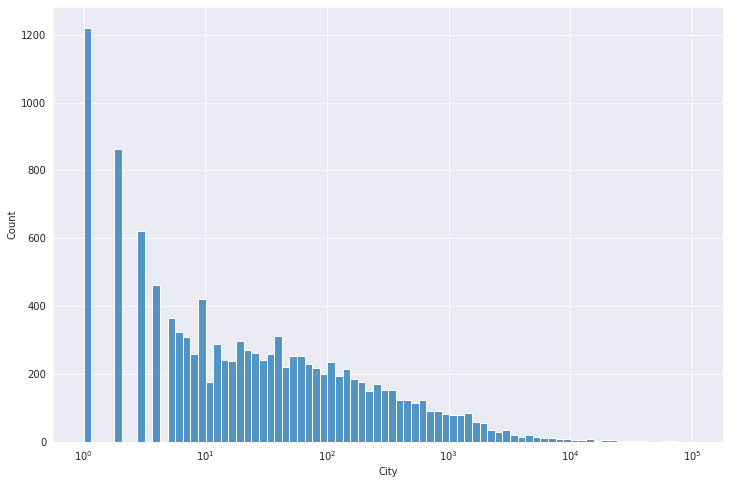

In [19]:
plt.figure(figsize=(12,8))
sns.histplot(cities_by_accidents, log_scale=True, bins=80)

We can see that many cities have a very low number of accidents reported. We can analyze this further by checking what percentage of cities have reported more than 1,000 accidents in the timeframe.

In [20]:
high_accident_cities = cities_by_accidents[cities_by_accidents >= 1000]
low_accident_cities = cities_by_accidents[cities_by_accidents < 1000]

In [23]:
(len(high_accident_cities) / len(cities)) * 100

5.2435723951285516

We can see that less than 5% of the cities have reported more than 1,000 accidents.

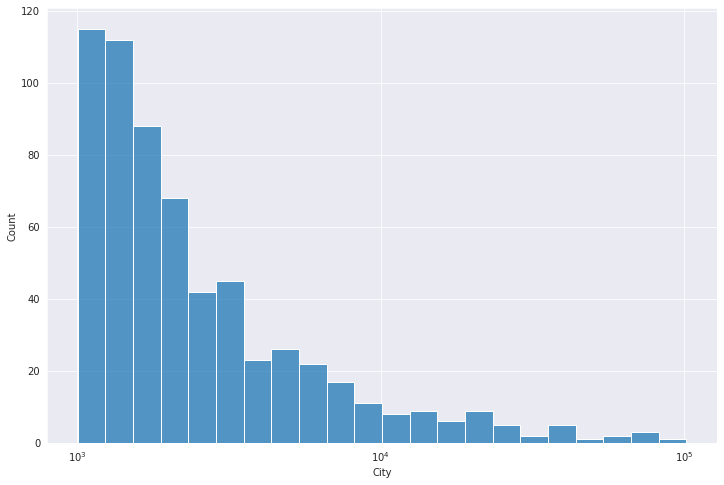

In [25]:
plt.figure(figsize=(12,8))
sns.histplot(high_accident_cities, log_scale=True)

Even in the cities that reported more than 1,000 accidents, most have reported between 1,000 and 10,000 accidents. We can further create a sub-type called very high accident cities with more than 10,000 accidents.

In [26]:
very_high_accident_cities = cities_by_accidents[cities_by_accidents >= 10000]

In [30]:
print(f"Number of very high accident cities = {len(very_high_accident_cities)}")
print(f"Percentage of dataset = {(len(very_high_accident_cities) / len(cities)) * 100}")

Number of very high accident cities = 52
Percentage of dataset = 0.4397834912043302


We can see that these 52 cities represent only **0.43%** of the entire dataset.

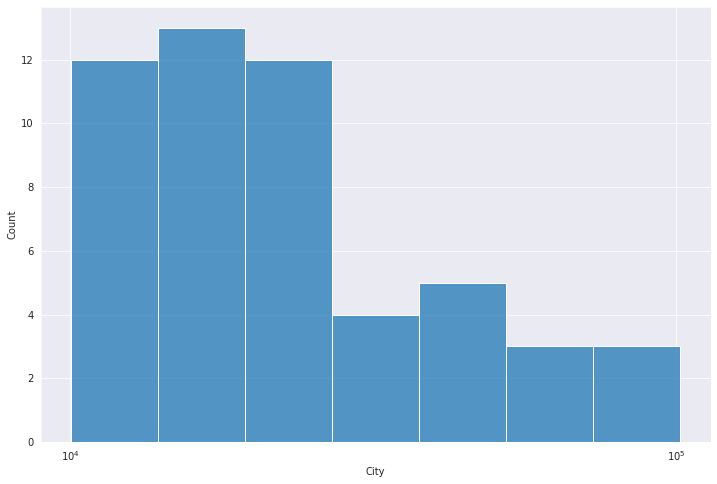

In [28]:
plt.figure(figsize=(12,8))
sns.histplot(very_high_accident_cities, log_scale=True)

#### Number of accidents from very high accident cities
We know that 52 cities have reported >= 10,000 accidents. We can now check the total number of accidents reported by these cities.


In [42]:
city_names = very_high_accident_cities.keys()
city_names = np.array(city_names)
city_names

array(['Houston', 'Charlotte', 'Dallas', 'Los Angeles', 'Austin', 'Miami',
       'Raleigh', 'Atlanta', 'Baton Rouge', 'Nashville', 'Oklahoma City',
       'Orlando', 'Sacramento', 'Minneapolis', 'Phoenix', 'San Diego',
       'San Antonio', 'Seattle', 'Richmond', 'Jacksonville', 'Saint Paul',
       'Portland', 'Greenville', 'Chicago', 'Indianapolis', 'San Jose',
       'Columbia', 'Denver', 'Tucson', 'Omaha', 'Rochester', 'Tulsa',
       'Dayton', 'Detroit', 'Oakland', 'Flint', 'Grand Rapids', 'Tampa',
       'Fort Lauderdale', 'Riverside', 'Bronx', 'Columbus', 'Louisville',
       'Salt Lake City', 'El Paso', 'Long Beach', 'Saint Louis',
       'Kansas City', 'San Francisco', 'Anaheim', 'San Bernardino',
       'Philadelphia'], dtype=object)

In [44]:
very_h_cities = df[df.City.isin(city_names)]

In [49]:
print(f"Number of accidents in reported by citites in Very High (>=10,000) accidents range = {len(very_h_cities)}")
print(f"Total Number of Cities in dataset = {len(df)}")
print(f"Percentage of accidents reported by cities in Very High (>=10,000) accidents range = {round((len(very_h_cities) / len(df)) * 100, 2)} %")

Number of accidents in reported by citites in Very High (>=10,000) accidents range = 1393963
Total Number of Cities in dataset = 3713885
Percentage of accidents reported by cities in Very High (>=10,000) accidents range = 37.53 %


We can see that the Cities in the Very High (>=10,000) accidents range contribute to **37.53%** of all accident data. Moreover, the number of cities that contribute this data is only **52** and represents **0.43%** of all cities present in the dataset.

### Start Time Column

In [ ]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
4232536    2019-08-23 18:03:25
4232537    2019-08-23 19:11:30
4232538    2019-08-23 19:00:21
4232539    2019-08-23 19:00:21
4232540    2019-08-23 18:52:06
Name: Start_Time, Length: 4232541, dtype: object

In [ ]:
df.Start_Time = pd.to_datetime(df.Start_Time)

We convert the Start_Time column to the datetime format.

In [ ]:
df.Start_Time[0].hour

5

In [ ]:
df['Hour_of_Day'] = df.Start_Time.dt.hour

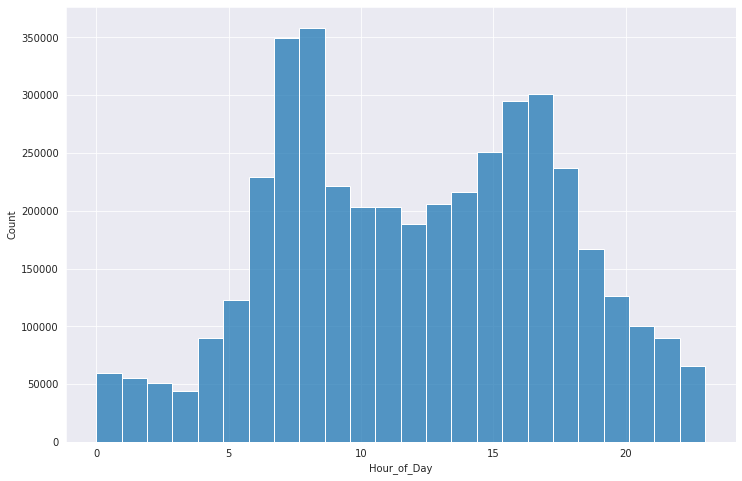

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(df.Hour_of_Day, bins=24)

A high percentage of accidents occur between 6 AM and 10 AM (probably people in a hurry to get to work)
Next highest percentage is 3 PM to 6 PM.

In [ ]:
df['Day_of_Week'] = df.Start_Time.dt.dayofweek

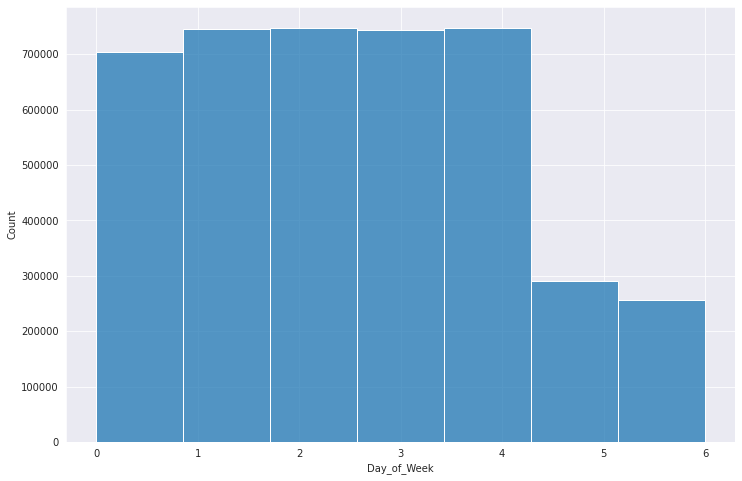

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(df.Day_of_Week, bins=7)

We can see that the number of accidents are higher on weekdays and lower on weekends.


Q. Is the distribution of accidents by hour the same on weekends as on weekends.

In [ ]:
weekends_start_time = df.Start_Time[df.Start_Time.dt.dayofweek >= 5]

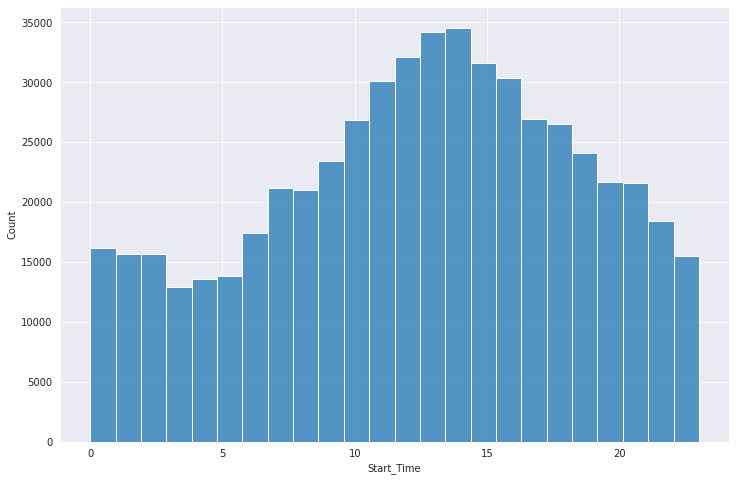

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(weekends_start_time.dt.hour, bins=24)

We can see that on weekends, the data distribution is more spread out and the accidents acutally happen more during the afternoon.

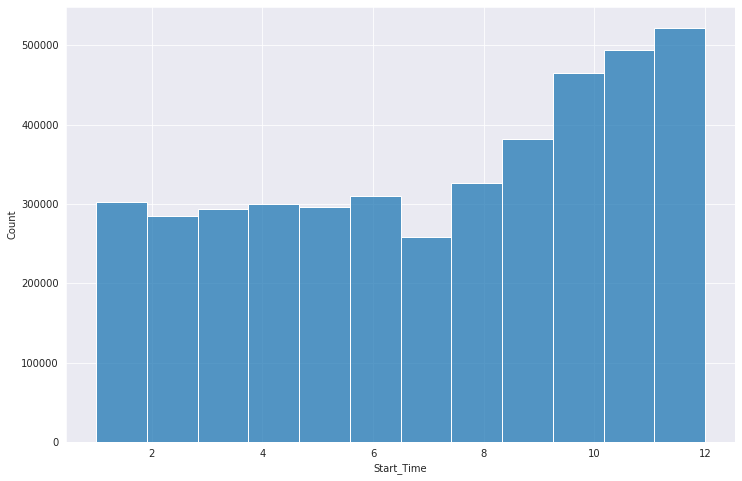

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(df.Start_Time.dt.month, bins=12)

Can you explain the month wise trend of accidents?

Use Folium for maps

In [ ]:
import folium

## Questions and Answers

1. Are there more accidents in warmer or colder areas?
2. Which 5 states have the highest number of accidents? How about per capita?
3. Does New York show up in the data? If yes, why is the count lower if it is the most populated city
4. Among the top 100 cities in number of accidents, which states do they belong to most frequently?
5. What time of the day are the accidents more frequent in?
6. Which days of the week have the most accidents?
7. Which months have the most accidents?
8. What is the trend of accidents YoY (decreasing/increasing)?
9. When is accidents per unit traffic the highest.

## Summary & Conclusions
- The number of accidents per city decreases exponentially.
- Less than 5% of cities have more than 1000 yearly accidents
- Over 1200 cities have reported just 1 accident (need to investigate)